In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [1251]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import LatentDirichletAllocation, NMF, PCA
from sklearn.feature_extraction import text 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

In [3]:
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
!ls data/boston

calendar.csv  listings.csv  reviews.csv


In [5]:
boston_calendar = pd.read_csv('data/boston/calendar.csv')
boston_listings = pd.read_csv('data/boston/listings.csv')
boston_reviews = pd.read_csv('data/boston/reviews.csv')

seattle_calendar = pd.read_csv('data/seattle/calendar.csv')
seattle_listings = pd.read_csv('data/seattle/listings.csv')
seattle_reviews = pd.read_csv('data/seattle/reviews.csv')

### 1. Data wrangling

In [6]:
boston_calendar.shape, boston_listings.shape, boston_reviews.shape

((1308890, 4), (3585, 95), (68275, 6))

In [7]:
boston_listings.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bath

In [8]:
boston_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [245]:
boston_listings.iloc[1,:]

id                                                                            3075044
scrape_id                                                              20160906204935
last_scraped                                                               2016-09-07
name                                                Charming room in pet friendly apt
summary                             Charming and quiet room in a second floor 1910...
space                               Small but cozy and quite room with a full size...
description                         Charming and quiet room in a second floor 1910...
experiences_offered                                                              none
neighborhood_overview               The room is in Roslindale, a diverse and prima...
transit                             Plenty of safe street parking. Bus stops a few...
access                              Apt has one more bedroom (which I use) and lar...
interaction                         If I am at home, I

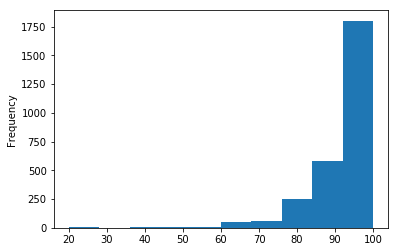

In [248]:
boston_listings['review_scores_rating'].plot.hist()

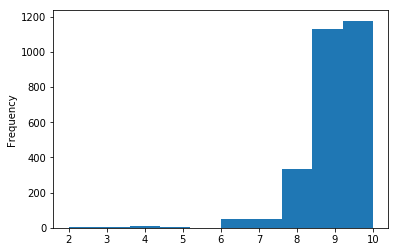

In [249]:
boston_listings['review_scores_value'].plot.hist()

In [140]:
boston_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [147]:
boston_reviews[boston_reviews['listing_id']==3075044]

,listing_id,id,date,reviewer_id,reviewer_name,comments
51089,3075044,13631717,2014-06-01,9645972,Dmitrii,Andrea is a great host. Neighborhood is wonder...
51090,3075044,13866662,2014-06-06,12020681,Paola,We had a great time at Andrea's place. He is v...
51091,3075044,14990373,2014-06-30,8165047,Jaydee,Adrea was very welcoming and flexible to our n...
51092,3075044,19807601,2014-09-18,21319433,Anthony,Andrea made us feel welcome because he made th...
51093,3075044,20322887,2014-09-27,21706950,Xinny,Me and my friend were so happy about Andrea's ...
51094,3075044,21058032,2014-10-10,22007743,Dennis,"Andrea was a great host. Very nice, helpful, u..."
51095,3075044,21263552,2014-10-13,22200211,Quentin,Andrea was really welcoming and gave us precio...
51096,3075044,21627617,2014-10-20,9395861,Yat,Andrea was really welcoming and a great host. ...
51097,3075044,22565955,2014-11-09,16903138,Yanfei,Andrea is very friendly. The room is nice and...
51098,3075044,28918466,2015-03-31,24807052,Angie,Andrea is an excellent host! The location is ...


To join or not to join, that's the question. Let's start small, checking for NaN entries.

____
## 2. Data cleaning

### 2.1 Remove columns

There is quite a lot of data here and a lot of NaNs everywhere. It is going to be painful.

Let's take some baby steps. We first want to eliminate columns with too many NaNs. One dataframe, boston_listings, with its 95 features is an obvious target. I would leave the other two alone for now. 

In [11]:
# get columns without NaN
bl_notnull = boston_listings.loc[:,boston_listings.notnull().all()].columns.values
# for the columns with NaNs, get the fraction of NaNs per column
bl_missing = boston_listings.isnull().mean()
bl_missing = bl_missing[bl_missing!=0]

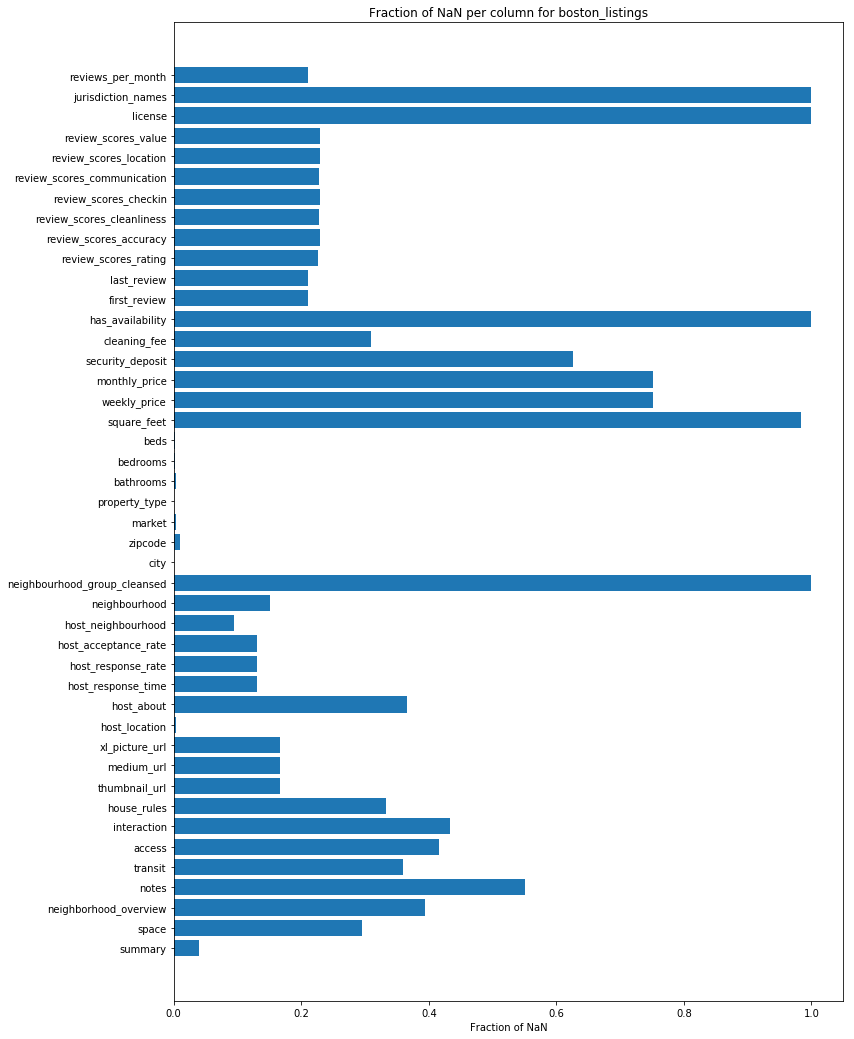

In [12]:
fig, ax = plt.subplots(figsize=(12,18))
ax.barh(bl_missing.index, bl_missing)
ax.set_xlabel('Fraction of NaN')
plt.title('Fraction of NaN per column for boston_listings');

In [13]:
list_remove = bl_missing[bl_missing>0.5].index.values.tolist()
print(list_remove)

['notes', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price', 'monthly_price', 'security_deposit', 'has_availability', 'license', 'jurisdiction_names']


At this point we need to decide where we draw the line for removing columns. I established 50% missing values and that's quite subjective. However, 50% includes pretty much the same columns as the 75% cutoff (which, of course, is another arbitrary value). 

Taking a look at the columns that will be scalped, I was surprised that some seemingly important categories like 'square_feet' or 'security_deposit' have NaN values. I guess that the information contained in 'weekly_price' and 'monthly_price' is redundant with the basic category 'price'. 

Ideally, we could train a simple neural network with using the other features and predict the missing values. But we don't have time for now...

Moving on, let's remove the columns with more than 50% missing data.

In [14]:
# add selected columns to be removed
list_remove.extend(['listing_url','host_url','host_location','host_response_time','host_thumbnail_url','host_picture_url',
                    'host_verifications','host_has_profile_pic','thumbnail_url','medium_url','picture_url','xl_picture_url'])

In [15]:
list_remove

['notes',
 'neighbourhood_group_cleansed',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'has_availability',
 'license',
 'jurisdiction_names',
 'listing_url',
 'host_url',
 'host_location',
 'host_response_time',
 'host_thumbnail_url',
 'host_picture_url',
 'host_verifications',
 'host_has_profile_pic',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url']

In [16]:
boston_listings.drop(list_remove, axis=1, inplace=True)

In [20]:
columns = boston_listings.iloc[1,:].index

Index(['id', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'transit', 'access', 'interaction', 'house_rules', 'host_id', 'host_name', 'host_since', 'host_about', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating',
       'review_sc

In [21]:
# 9 features were removed from boston_listings
boston_listings.shape


(3585, 74)

### 2.2 Remove rows

Columns are gone and now we can take a look at the rows. Let's check the distribution of missing values per row.

In [ ]:
boston_listings.shape

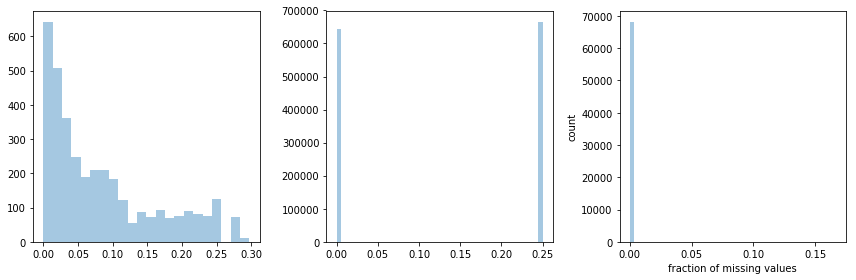

In [22]:
bl_rowNull = boston_listings.isnull().sum(axis=1) / boston_listings.shape[1]
bc_rowNull = boston_calendar.isnull().sum(axis=1) / boston_calendar.shape[1]
br_rowNull = boston_reviews.isnull().sum(axis=1) / boston_reviews.shape[1]

fig, axes = plt.subplots(1,3, figsize=(12, 4))
sns.distplot(bl_rowNull, kde=False, ax=axes[0])
plt.xlabel('fraction of missing values')
plt.ylabel('count')

sns.distplot(bc_rowNull, kde=False, ax=axes[1])
sns.distplot(br_rowNull, kde=False, ax=axes[2])
plt.tight_layout()

#plt.suptitle('Missing values per row for boston_listings')

For NaNs per row, 30% is the ceiling. For the other two we got what we expected. That's not bad, it is probably worthy trying to impute these values. 

In [216]:
bl_columns = boston_listings.columns.to_series().groupby(boston_listings.dtypes).groups

In [224]:
bl_columns

{dtype('int64'): Index(['id', 'scrape_id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'accommodates', 'guests_included', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'calculated_host_listings_count'], dtype='object'),
 dtype('float64'): Index(['latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month'], dtype='object'),
 dtype('O'): Index(['last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'transit', 'access', 'interaction', 'house_rules', 'host_name', 'host_since', 'host_about', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_identity_verified', 'street', 'neighbourhood', 'neig

## What to do

- latent dirichlet allocation for topic identification
- identify keywords for each neighborhood - trends
- sentiment analysis of reviews
- renting trends around the year
- apply PCA to listings to determine most relevant features
    - one-hot encode amenities, property_type, room_type
    - clusterize results from PCA
- best rated units
- autoencoder?
- summarize features per unit id, join tables and predict if they will be rented
- compare to seattle

### Demand over time

First let's start with the easy part, the calendar dataframe. How is the mean price distributed over time?

In [24]:
# convert dates to year - month - day
boston_calendar[['year','month','day']] = boston_calendar['date'].str.split(pat='-', expand=True)

In [25]:
# convert prices from str to float
boston_calendar['price']=pd.to_numeric(boston_calendar['price'].str.strip('$'), errors='coerce')

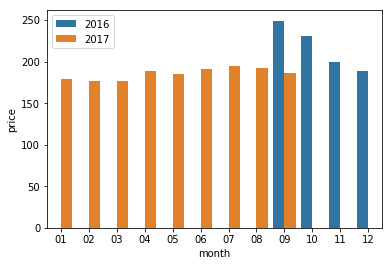

In [26]:
_ = boston_calendar[boston_calendar['price'].notnull()].groupby(['year','month']).agg({'price':'mean'}).reset_index()
sns.barplot(x='month', y='price', hue='year', data=_);
plt.legend(loc='upper left');

How is the occupation over time?

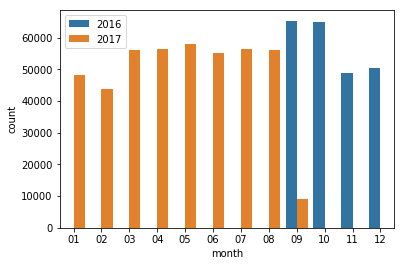

In [27]:
boston_calendar[boston_calendar['price'].isnull()].groupby(['year','month']).sum().reset_index()
_ = boston_calendar[boston_calendar['price'].isnull()].groupby(['year','month']).size().reset_index()
_.rename(columns={0:'count'}, inplace=True)
sns.barplot(x='month', y='count', hue='year', data=_);
plt.legend(loc='upper left');

### Bag of words

Let's check the overviews written by the owners. It might give us some sense about the "vibe" of the region. However, I don't expect to find anything like "wow, this region is really sketchy". 

The first thing we notice is that 40% of the overviews are missing.

In [28]:
# 40% of neighborhood overviews missing
boston_listings['neighborhood_overview'].isnull().sum() / boston_listings.shape[0]

0.3947001394700139

We take the rest and convert to a new dataframe

In [29]:
bl_no = boston_listings.loc[boston_listings['neighborhood_overview'].notnull(), 
                            ['host_neighbourhood','neighborhood_overview']]
print(type(bl_no))
bl_no.head()

<class 'pandas.core.frame.DataFrame'>


,host_neighbourhood,neighborhood_overview
0,Roslindale,"Roslindale is quiet, convenient and friendly. ..."
1,Roslindale,"The room is in Roslindale, a diverse and prima..."
2,Roslindale,The LOCATION: Roslindale is a safe and diverse...
3,NaN,Roslindale is a lovely little neighborhood loc...
4,Roslindale,"I love the proximity to downtown, the neighbor..."


In [36]:
bl_no.shape

(2170, 2)

In [47]:
bl_no_grouped = bl_no.groupby('host_neighbourhood').agg({'neighborhood_overview':'sum'}).reset_index()

In [66]:
bl_no_grouped.head()

,host_neighbourhood,neighborhood_overview
0,Allston-Brighton,The Back Bay neighborhood runs along the Charl...
1,Back Bay,"Living at The Longwood Apartments, residents w..."
2,Beacon Hill,Great location! Walk to the Longwood Medical A...
3,Belváros,Conveniently located across from premier shopp...
4,Benton Park,"Once called ""The Eden of America"" by a visitor..."


In [84]:
bl_no_grouped.shape

(46, 3)

In [135]:
my_stop_words=['boston']
stop_words = text.ENGLISH_STOP_WORDS.union(my_stop_words)

In [90]:
list_msg=[]
for i in range(bl_no_grouped.shape[0]):
    count_vect = CountVectorizer(stop_words=stop_words)
    X_train = count_vect.fit_transform([bl_no_grouped.loc[i,'neighborhood_overview']])
    lda = LatentDirichletAllocation(n_components=1,random_state=34)
    lda.fit(X_train) 
    feature_names = count_vect.get_feature_names()
    for idx, topic in enumerate(lda.components_):
        message = " ".join([feature_names[i] for i in topic.argsort()[:-11 :-1]])
    list_msg.extend([message])

In [91]:
bl_no_grouped['message']=list_msg

In [94]:
bl_no_grouped[['host_neighbourhood','message']]

,host_neighbourhood,message
0,Allston-Brighton,restaurants neighborhood harvard walk allston ...
1,Back Bay,street restaurants walk neighborhood bay publi...
2,Beacon Hill,hill beacon street neighborhood public restaur...
3,Belváros,water silver shuttle shopping premier nightlif...
4,Benton Park,jamaica square park plain home pond jp street ...
5,Bernal Heights,attractions charles house center commons easy ...
6,Brookline,location brookline allston neighborhood area c...
7,Cambridge,neighborhood street square restaurants near cl...
8,Central Business District,miles mile park home garden bruins celtics chr...
9,Charlestown,charlestown neighborhood hill bunker navy monu...


In [97]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)

In [98]:
#clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [136]:
n_components=1
list_msg=[]
for i in range(bl_no_grouped.shape[0]):
    tfidf_vectorizer = TfidfVectorizer(max_df=10, min_df=1,
                                   max_features=20,
                                   stop_words=stop_words)
    tfidf = tfidf_vectorizer.fit_transform([bl_no_grouped.loc[i,'neighborhood_overview']])
    tfidf_feature_names = tfidf_vectorizer.get_feature_names()
    nmf = NMF(n_components=n_components, random_state=1,alpha=.1, l1_ratio=.5).fit(tfidf)
    
    
    feature_names = tfidf_vectorizer.get_feature_names()
    for idx, topic in enumerate(nmf.components_):
        #list_msg.extend([feature_names[i] for i in topic.argsort()])
        message = " ".join([feature_names[i] for i in topic.argsort()[:-11 :-1]])
        #print(topic.argsort())
    list_msg.extend([message])

In [138]:
list_msg

['restaurants neighborhood harvard walk allston close safe bars square quiet',
 'street restaurants walk neighborhood bay public newbury shopping located center',
 'hill beacon street neighborhood public restaurants shops charles neighborhoods transportation',
 'water silver shuttle shopping premier nightlife major located line highways',
 'jamaica square park street home jp just luna major brewery',
 'attractions charles train fenway food garden gardens government historic house',
 'location allston area brookline neighborhood village university live looking movie',
 'neighborhood street square restaurants near close area safe nice lively',
 'miles mile park home garden faneuil bruins celtics christopher columbus',
 'charlestown neighborhood hill bunker monument navy city historic yard restaurants',
 'street amazing charles places streets oldest neighborhood neighborhoods newbury nicest',
 'location apartment ve neighborhoods property portsmouth minutes有shopping offer overstated place

## Sentiment Analysis with reviews

In [455]:
boston_reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [462]:
boston_calendar['occupied'] = boston_calendar['available'].apply(lambda x: 1 if x=='f' else 0)

In [466]:
boston_price = boston_calendar.groupby('listing_id').agg({'price':'mean', 'occupied':'sum'})

In [468]:
boston_price.reset_index(inplace=True)

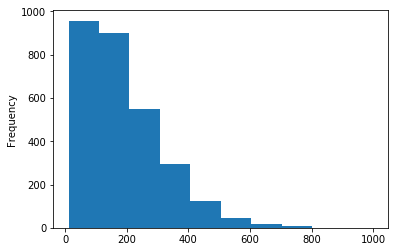

In [470]:
boston_price['price'].plot.hist()

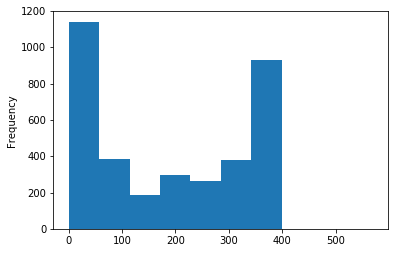

In [472]:
boston_price['occupied'].plot.hist()

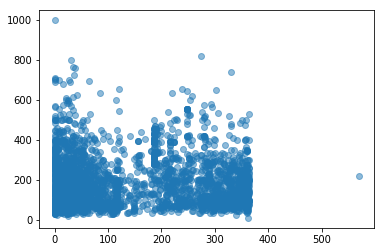

In [1330]:
plt.scatter(boston_price['occupied'], boston_price['price'], alpha=0.5)

In [1333]:
boston_price.head()

,listing_id,price,occupied
0,3353,35.204819,116
1,5506,147.267442,21
2,6695,197.407407,41
3,6976,65.000000,46
4,8792,154.000000,117


In [1336]:
boston_price2 = boston_price.merge(boston_listings, left_on='listing_id', right_on='id')

In [1344]:
boston_price2.head()

,listing_id,price_x,occupied,id,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,transit,access,interaction,house_rules,host_id,host_name,host_since,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price_y,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,3353,35.204819,116,3353,20160906204935,2016-09-07,Private & Small for Solo Travelers,"Clean and comfortable room, good for short ter...",Hey Traveler! We have a nice apartment about 3...,"Clean and comfortable room, good for short ter...",none,NaN,"Convenient to the subway and busses, which are...","Full access to the kitchen, living room, and b...","We're not home much, so you'll have plenty of ...",No smoking or drugs. We try to keep the house ...,4240,Giuseppe,2008-11-11,Pretty low key guy. No drugs or drama,90%,78%,f,Allston-Brighton,6,6,t,"Gardner St, Allston, MA 02134, United States",Allston-Brighton,Allston,Allston,MA,02134,Boston,"Allston, MA",US,United States,42.355017,-71.127590,t,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",$40.00,$50.00,1,$0.00,7,365,2 months ago,0,0,0,249,2016-09-06,34,2009-04-23,2016-08-24,90.0,9.0,8.0,9.0,9.0,9.0,9.0,f,f,strict,f,f,2,0.38
1,5506,147.267442,21,5506,20160906204935,2016-09-07,$99 Special! Hotel Alternative!,NaN,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,none,"Peacful, Architecturally interesting, histori...","Excellent Access to all of Boston, Walk to Mus...",NaN,NaN,No Smoking in the Building.,8229,Terry,2009-02-19,"Relaxed, Easy going, Accommodating.",100%,90%,f,Roxbury,7,7,t,"Centre Place, Boston, MA 02119, United States",Roxbury,Roxbury,Boston,MA,02119,Boston,"Boston, MA",US,United States,42.329809,-71.095595,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$145.00,$40.00,2,$0.00,3,730,a week ago,14,39,69,344,2016-09-06,36,2009-03-21,2016-06-08,91.0,9.0,10.0,10.0,10.0,9.0,10.0,f,f,strict,f,f,6,0.40
2,6695,197.407407,41,6695,20160906204935,2016-09-07,$125 Special!! Home Away! Condo,NaN,** WELCOME *** FULL PRIVATE APARTMENT In a His...,** WELCOME *** FULL PRIVATE APARTMENT In a His...,none,"Peaceful, Architecturally interesting, histori...","We are a 5 minute walk to the subway, 5 minut...",NaN,NaN,No Smoking in the Building.,8229,Terry,2009-02-19,"Relaxed, Easy going, Accommodating.",100%,90%,f,Roxbury,7,7,t,"Centre Place, Boston, MA 02119, United States",Roxbury,Roxbury,Boston,MA,02119,Boston,"Boston, MA",US,United States,42.329941,-71.093505,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$195.00,$70.00,2,$8.00,3,730,today,3,19,49,324,2016-09-06,47,2009-08-06,2016-05-26,95.0,9.0,10.0,10.0,10.0,8.0,9.0,f,f,strict,f,f,6,0.54
3,6976,65.000000,46,6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,"PUBLIC TRANSPORTATION: From the

In [1361]:
boston_price2.groupby('neighbourhood_cleansed').agg({'occupied':'sum'}).sort_values(by='occupied', ascending=False).reset_index()[:10]

,neighbourhood_cleansed,occupied
0,South End,64919
1,Jamaica Plain,63453
2,Fenway,62487
3,Allston,60607
4,Back Bay,53160
5,Beacon Hill,39057
6,Brighton,36326
7,Dorchester,34598
8,Downtown,31902
9,South Boston,30529


In [1360]:
boston_price2.groupby('neighbourhood_cleansed').agg({'price_x':'mean'}).sort_values(by='price_x', ascending=False).reset_index()[:10]

,neighbourhood_cleansed,price_x
0,Leather District,345.088090
1,West End,327.495114
2,South Boston Waterfront,319.479329
3,Chinatown,312.988444
4,Bay Village,294.874692
5,Downtown,270.331122
6,Back Bay,267.895377
7,Fenway,256.373370
8,Beacon Hill,229.130167
9,North End,220.927310


In [1362]:
_1 = boston_price2.groupby('neighbourhood_cleansed').agg({'occupied':'sum'}).reset_index()
_2 = boston_price2.groupby('neighbourhood_cleansed').agg({'price_x':'mean'}).reset_index()
occ_price = _1.merge(_2, on='neighbourhood_cleansed')

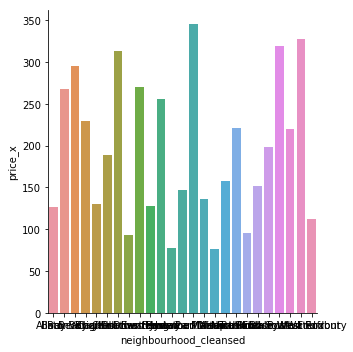

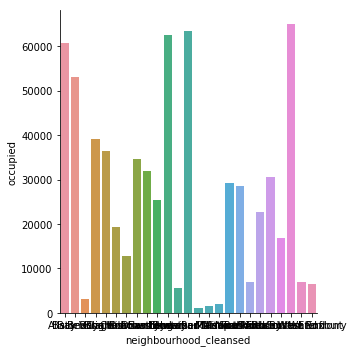

In [1368]:
sns.catplot(x="neighbourhood_cleansed", y="price_x", kind="bar", data=occ_price);
sns.catplot(x="neighbourhood_cleansed", y="occupied", kind="bar", data=occ_price);

In [149]:
br_no = boston_reviews.loc[boston_reviews['comments'].notnull(), 
                            ['date','listing_id','comments']]
br_no_grouped = br_no.groupby('listing_id').agg({'comments':'sum'}).reset_index()

In [150]:
br_no_grouped.head()

,listing_id,comments
0,3353,Very friendly and helpful. Convenient location...
1,5506,Terry's Hotel Alterntv in Boston was a perfect...
2,6695,Terry's apartment is beautifully decorated and...
3,6976,"A Wonderful, pleasant, and charming host. The..."
4,8792,"The unit was quiet, convenient, & excellently ..."


In [153]:
boston_listings['review_scores_rating'].head()

0      NaN
1     94.0
2     98.0
3    100.0
4     99.0
Name: review_scores_rating, dtype: float64

In [157]:
sentiment_df = br_no_grouped.merge(boston_listings[['id','review_scores_rating']], left_on='listing_id', right_on='id')

In [158]:
sentiment_df.dropna(inplace=True)

In [162]:
sentiment_df.head()

,listing_id,comments,id,review_scores_rating
0,3353,Very friendly and helpful. Convenient location...,3353,90.0
1,5506,Terry's Hotel Alterntv in Boston was a perfect...,5506,91.0
2,6695,Terry's apartment is beautifully decorated and...,6695,95.0
3,6976,"A Wonderful, pleasant, and charming host. The...",6976,98.0
4,8792,"The unit was quiet, convenient, & excellently ...",8792,91.0


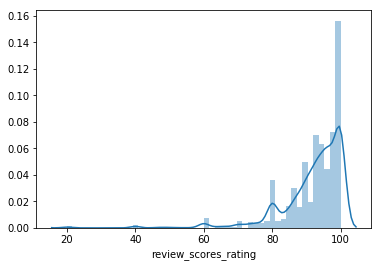

In [405]:
sns.distplot(sentiment_df['review_scores_rating'])

In [407]:
sentiment_df['review_scores_rating'].quantile([.25,.5,.75])

0.25    89.00
0.50    94.00
0.75    98.25
Name: review_scores_rating, dtype: float64

In [429]:
sentiment_df['score_group'] = sentiment_df['review_scores_rating'].apply(lambda x: 3 if x>98.2 else (2 if x>94 and x<98.25 else (1 if x>89 and x<94 else 0)))

In [ ]:
sen

In [199]:
sentiment_df['int_scores'] = pd.to_numeric(sentiment_df['review_scores_rating'], downcast='integer')

In [430]:
sentiment_df.head()

,listing_id,comments,id,review_scores_rating,int_scores,score_group
0,3353,Very friendly and helpful. Convenient location...,3353,90.0,90,1
1,5506,Terry's Hotel Alterntv in Boston was a perfect...,5506,91.0,91,1
2,6695,Terry's apartment is beautifully decorated and...,6695,95.0,95,2
3,6976,"A Wonderful, pleasant, and charming host. The...",6976,98.0,98,2
4,8792,"The unit was quiet, convenient, & excellently ...",8792,91.0,91,1


In [449]:
sentiment_df.loc[0,'comments']

"Very friendly and helpful. Convenient location.The location is great as it's right next to the Green T stop and there are many food places nearby. The room is very small and fits a queen mattress and almost nothing else. I was out for most of the day and only used the room for the night, which worked for me. The host is friendly and helpful.Giueseppe was cordial, friendly, nice ... and so were the others in the apartment. He made himself available to meet me late on the night I checked in. The room is good value for money and met my criteria (central, safe, clean, private). If this is what you are looking for, I recommend it without reservation. Good host, as well as his roommates (special thanks to Miles), and the house is very nicely located - a few blocks to the green line T station and bus stops, with several restaurants, shops and food stores in the neighborbood. Only the room is somehow awkward, but it has great potential of improvement... anyhow, it was certainly worthwhile.The

In [450]:
sentiment_df.shape

(2772, 6)

In [562]:
sentiment_df[]

,listing_id,comments,id,review_scores_rating,int_scores,score_group
0,3353,Very friendly and helpful. Convenient location...,3353,90.0,90,1
1,5506,Terry's Hotel Alterntv in Boston was a perfect...,5506,91.0,91,1
2,6695,Terry's apartment is beautifully decorated and...,6695,95.0,95,2
3,6976,"A Wonderful, pleasant, and charming host. The...",6976,98.0,98,2
4,8792,"The unit was quiet, convenient, & excellently ...",8792,91.0,91,1
5,9273,Very patient even when we were having technica...,9273,100.0,100,3
6,9765,Everything was great. I wish they had advertis...,9765,89.0,89,0
7,9824,The location for the Back Bay Studio (on Heref...,9824,78.0,78,0
8,9855,"I stayed in the studio in lston St 1330, BoyFe...",9855,90.0,90,1
9,9857,"The apartment was very nice and comfortable, a...",9857,87.0,87,0


In [564]:
#count_vect = CountVectorizer(stop_words = stop_words, min_df=1, max_df=10, max_features=10, strip_accents='unicode')

count_vect = CountVectorizer(stop_words = stop_words, min_df=1000, max_df=3000, max_features=40000)
X_counts = count_vect.fit_transform(sentiment_df['comments'])


tf_transformer = TfidfTransformer(use_idf=True).fit(X_counts)
X_tf = tf_transformer.transform(X_counts)
#X_counts = X_tf

X_train, X_test, y_train, y_test = train_test_split(X_counts, sentiment_df['score_group'], test_size=0.33, shuffle=True)
nb_clf = MultinomialNB().fit(X_train, y_train)
#nb_preds = nb_clf.predict(test_vectors)
nb_preds = nb_clf.predict(X_test)
print(accuracy_score(y_test, nb_preds))

count_vect.vocabulary_

0.4644808743169399


{'friendly': 45,
 'helpful': 50,
 'convenient': 26,
 'location': 64,
 'great': 49,
 'right': 95,
 'places': 84,
 'nearby': 73,
 'room': 96,
 'small': 99,
 'day': 28,
 'night': 78,
 'host': 53,
 'nice': 77,
 'apartment': 6,
 'available': 10,
 'good': 47,
 'safe': 97,
 'clean': 21,
 'looking': 65,
 'recommend': 92,
 'thanks': 111,
 'house': 54,
 'located': 63,
 'line': 60,
 'station': 102,
 'restaurants': 94,
 'place': 83,
 'cozy': 27,
 'away': 11,
 'bit': 18,
 'quiet': 89,
 'overall': 79,
 'stay': 103,
 'arrival': 8,
 'close': 22,
 'easy': 36,
 'access': 2,
 'town': 114,
 'bed': 15,
 'exactly': 38,
 'comfortable': 24,
 'super': 108,
 'quite': 90,
 'area': 7,
 'short': 98,
 'walk': 118,
 'arrived': 9,
 'home': 52,
 'lot': 66,
 'feel': 43,
 'just': 55,
 'neighborhood': 76,
 'responsive': 93,
 'needed': 75,
 'street': 106,
 'need': 74,
 'able': 1,
 'highly': 51,
 'staying': 105,
 'perfect': 82,
 'really': 91,
 'stayed': 104,
 'definitely': 30,
 'like': 59,
 'trip': 115,
 'got': 48,
 'minut

In [418]:
count_vect.vocabulary_

{'friendly': 2806,
 'helpful': 3209,
 'convenient': 1590,
 'location': 3937,
 'great': 3030,
 'right': 5589,
 'green': 3036,
 'stop': 6256,
 'food': 2737,
 'places': 4911,
 'nearby': 4387,
 'room': 5618,
 'small': 6003,
 'fits': 2677,
 'queen': 5230,
 'mattress': 4131,
 'day': 1801,
 'used': 6931,
 'night': 4464,
 'worked': 7259,
 'host': 3307,
 'cordial': 1624,
 'nice': 4454,
 'apartment': 444,
 'available': 628,
 'meet': 4153,
 'late': 3770,
 'checked': 1236,
 'good': 2984,
 'value': 6967,
 'money': 4299,
 'met': 4197,
 'criteria': 1706,
 'central': 1161,
 'safe': 5669,
 'clean': 1315,
 'private': 5106,
 'looking': 3965,
 'recommend': 5353,
 'reservation': 5496,
 'roommates': 5624,
 'special': 6134,
 'thanks': 6545,
 'miles': 4231,
 'house': 3326,
 'nicely': 4455,
 'located': 3934,
 'blocks': 867,
 'line': 3874,
 'station': 6216,
 'bus': 1033,
 'stops': 6260,
 'restaurants': 5536,
 'shops': 5889,
 'stores': 6264,
 'awkward': 653,
 'potential': 5017,
 'improvement': 3417,
 'certainly'

In [386]:
count_vect.get_feature_names()

['000',
 '1000',
 '1min',
 '2012',
 '20mn',
 '360',
 '37',
 '46',
 '47',
 '51',
 '5mn',
 '60s',
 '64',
 '76',
 '7th',
 '86',
 '99',
 'aan',
 'abnb',
 'abordable',
 'abreise',
 'absent',
 'academic',
 'accent',
 'accessable',
 'accomdating',
 'addressing',
 'advanced',
 'adventurous',
 'advertized',
 'af',
 'afford',
 'afterward',
 'againi',
 'aggressive',
 'agit',
 'ahmed',
 'aihua',
 'ait',
 'ale',
 'alena',
 'alexandra',
 'alguna',
 'algunas',
 'algunos',
 'alike',
 'allan',
 'ally',
 'alten',
 'amanda',
 'ambulances',
 'amd',
 'amenage',
 'amiable',
 'amy',
 'ana',
 'andre',
 'andrews',
 'andy',
 'angeboten',
 'angel',
 'anna',
 'anreise',
 'anxiety',
 'anya',
 'apenas',
 'appleton',
 'apply',
 'aqui',
 'ar',
 'architect',
 'ari',
 'aris',
 'arriva',
 'arrivare',
 'arthur',
 'artistically',
 'atencioso',
 'attendant',
 'avoiding',
 'awoke',
 'backpack',
 'bahnstation',
 'bake',
 'balanced',
 'balconies',
 'balls',
 'banging',
 'barbara',
 'bardzo',
 'barking',
 'barney',
 'barry',
 

In [360]:
tfidf_vectorizer = TfidfVectorizer(max_df=10, min_df=1,
                                   max_features=20,
                                   stop_words=stop_words)
tfidf = tfidf_vectorizer.fit_transform(sentiment_df['comments'])

In [431]:
X_train, X_test, y_train, y_test = train_test_split(sentiment_df['comments'], sentiment_df['score_group'], test_size=0.33, shuffle=True)

In [432]:
vectorizer = TfidfVectorizer(min_df=5,
                             max_df = 0.8,
                             sublinear_tf=True,
                             use_idf=True)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

In [495]:
tf_transformer = TfidfTransformer().fit(X_counts)
X_tf = tf_transformer.transform(X_counts)

In [421]:
X_tf.shape

(2772, 7346)

In [496]:
X_counts = X_tf

In [504]:
X_train, X_test, y_train, y_test = train_test_split(X_counts, sentiment_df['score_group'], test_size=0.33, shuffle=True)
#X_train, X_test, y_train, y_test = train_test_split(X_tf, sentiment_df['score_group'], test_size=0.33, shuffle=True)

In [505]:
nb_clf = MultinomialNB(fit_prior=True).fit(X_train, y_train)
#nb_clf = MultinomialNB(fit_prior=True).fit(train_vectors, y_train)

In [506]:
#nb_preds = nb_clf.predict(test_vectors)
nb_preds = nb_clf.predict(X_test)

In [507]:
nb_clf.feature_count_

array([[16., 19., 25., ..., 19., 28., 23.],
       [ 7.,  2., 11., ..., 12.,  8.,  6.],
       [23., 15., 21., ..., 16., 18., 20.],
       [ 2.,  2.,  1., ...,  3.,  6.,  2.]])

In [508]:
confusion_matrix(y_test, nb_preds)

array([[172,  37,  19,  28],
       [106,  42,  23,  29],
       [ 58,  47,  66,  47],
       [125,  19,  39,  58]])

In [509]:
accuracy_score(y_test, nb_preds)

0.3693989071038251

## AdaBoost

In [754]:
boston_listings.isnull().sum()

id                                     0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              143
space                               1057
description                            0
experiences_offered                    0
neighborhood_overview               1415
transit                             1290
access                              1489
interaction                         1554
house_rules                         1192
host_id                                0
host_name                              0
host_since                             0
host_about                          1309
host_response_rate                   471
host_acceptance_rate                 471
host_is_superhost                      0
host_neighbourhood                   339
host_listings_count                    0
host_total_listings_count              0
host_identity_verified                 0
street          

In [1053]:
list_columns = ['id','host_since','host_response_rate','host_acceptance_rate','host_is_superhost','host_listings_count','neighbourhood_cleansed','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','cleaning_fee','minimum_nights','maximum_nights','availability_30','availability_60','availability_90','availability_365','number_of_reviews','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','cancellation_policy','require_guest_profile_picture','require_guest_phone_verification' ]

In [1463]:
list_columns = ['id',
                'host_since',
                'host_response_rate',
                'host_acceptance_rate',
                'host_is_superhost',
                'host_listings_count',
                'neighbourhood_cleansed',
                'property_type',
                'room_type',
                'accommodates',
                'bathrooms',
                'bedrooms',
                'beds',
                'bed_type',
                'amenities',
                'price',
                'cleaning_fee',
                'minimum_nights',
                'maximum_nights',
                'number_of_reviews',
                'review_scores_accuracy',
                'review_scores_cleanliness',
                'review_scores_checkin',
                'review_scores_communication',
                'review_scores_location',
                'review_scores_value',
                'instant_bookable',
                'cancellation_policy',
                'require_guest_profile_picture',
                'require_guest_phone_verification' ]

In [1455]:
boston_listings.price.isnull().values.any()

False

In [1486]:
def listing_pipeline(listing_df, price_df, list_columns=[], list_dummies=[], list_scale=[], list_review=[]):
    df = listing_df[list_columns].copy()
    
    df['host_since_year'] = df['host_since'].str.split(pat='-', expand=True)[0]
    base_year = pd.to_numeric(df['host_since_year'].unique().min())
    df['n_years'] = df['host_since_year'].apply(lambda x: pd.to_numeric(x) - base_year)
    df.drop(['host_since','host_since_year'], axis=1, inplace=True)
    
    df['host_response_rate'] = df['host_response_rate'].str.replace(r'%', r'.0').astype('float') / 100.0
    df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace(r'%', r'.0').astype('float') / 100.0
    df['host_is_superhost'] = df['host_is_superhost'].apply(lambda x: 1 if x=='t' else 0)
    
    df['amenities'] = df['amenities'].str.strip('{,}').str.split(pat=',', expand=True).isnull().sum(axis=1)    
    df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
    df['cleaning_fee'] = df['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
    df['instant_bookable'] = df['instant_bookable'].apply(lambda x: 0 if x=='f' else 1)
    
    #I am not sure if these two are relevant but I added them anyway. It might catch customers that are more privacy-oriented.
    df['require_guest_profile_picture'] = df['require_guest_profile_picture'].apply(lambda x: 0 if x=='f' else 1)
    df['require_guest_phone_verification'] = df['require_guest_phone_verification'].apply(lambda x: 0 if x=='f' else 1)

    #Done with choosing columns. Now let's take a look at the missing values.
    
    df['host_response_rate'] = df['host_response_rate'].fillna(0.0)
    df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(0.0)
    
    imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
    df['bathrooms'] = imp_median.fit_transform(df[['bathrooms']])
    df['bedrooms'] = imp_median.fit_transform(df[['bedrooms']])
    df['beds'] = imp_median.fit_transform(df[['beds']])
    
    imp_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    df['property_type'] = imp_mf.fit_transform(df[['property_type']])
    
   
    
    df[list_review] = imp_median.fit_transform(bl_list[list_review])
    #df['review_agg'] = df[list_review].mean(axis=1)
    #list_scale.extend(list_review)
    df['cleaning_fee'] = df['cleaning_fee'].fillna(0.0)
    
    df['review_agg'] = df[list_review].mean(axis=1)
    #qt = df['review_agg'].quantile([.25,.5,.75])
    #df['score_group'] = df['review_agg'].apply(lambda x: 4 if x>=qt[2] else 
    #                                               (3 if x>=qt[1] and x<qt[2] else 
    #                                                (2 if x>=qt[0] and x<qt[1] else 1)))
    
    df_dummies = pd.get_dummies(df[list_dummies])
    df2 = pd.merge(df, df_dummies, left_index=True, right_index=True)
    df2.drop(list_dummies,axis=1, inplace=True)
    
    #df2.drop('price', axis=1, inplace=True)
    #price_df.drop('price', axis=1, inplace=True)
    
    list_scale.extend(price_df.columns.values.tolist())
    list_scale.remove('listing_id')
    
    df3 = pd.merge(price_df, df2, left_on='listing_id', right_on='id', how='left')
    
    df3.drop('listing_id', axis=1, inplace=True)
    
    scaler = MinMaxScaler()
    df3[list_scale] = scaler.fit_transform(df3[list_scale])
    
    return df3
    

In [1491]:
list_dummies = ['room_type','bed_type','cancellation_policy','neighbourhood_cleansed','property_type']
list_scale = ['accommodates','bathrooms','bedrooms','beds','price','cleaning_fee','minimum_nights', 
                   'maximum_nights', 
                   'number_of_reviews','amenities','host_listings_count']
list_review = ['review_scores_accuracy',
                   'review_scores_cleanliness',
                   'review_scores_checkin',
                   'review_scores_communication',
                   'review_scores_location',
                   'review_scores_value']
list_scale.extend(list_review)
    
bldf = listing_pipeline(boston_listings, boston_price.copy(), list_columns, list_dummies, list_scale, list_review)

/home/brunom/.miniconda2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [1490]:
qt = bldf['review_agg'].quantile([.25,.5,.75])
    #df['score_group'] = df['review_agg'].apply(lambda x: 4 if x>=qt[2] else 
    #                                               (3 if x>=qt[1] and x<qt[2] else 
    #                                                (2 if x>=qt[0] and x<qt[1] else 1)))
qt    

0.25    9.333333
0.50    9.833333
0.75    9.833333
Name: review_agg, dtype: float64

In [1469]:
bldf.head()

,occupied,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,accommodates,bathrooms,bedrooms,beds,amenities,price,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,n_years,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,neighbourhood_cleansed_Allston,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Bay Village,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Charlestown,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Downtown,neighbourhood_cleansed_East Boston,neighbourhood_cleansed_Fenway,neighbourhood_cleansed_Hyde Park,neighbourhood_cleansed_Jamaica Plain,neighbourhood_cleansed_Leather District,neighbourhood_cleansed_Longwood Medical Area,neighbourhood_cleansed_Mattapan,neighbourhood_cleansed_Mission Hill,neighbourhood_cleansed_North End,neighbourhood_cleansed_Roslindale,neighbourhood_cleansed_Roxbury,neighbourhood_cleansed_South Boston,neighbourhood_cleansed_South Boston Waterfront,neighbourhood_cleansed_South End,neighbourhood_cleansed_West End,neighbourhood_cleansed_West Roxbury,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Camper/RV,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa
0,0.203509,3353,0.9,0.78,0,0.008011,0.000000,0.166667,0.2,0.0625,0.666667,0.007519,0.166667,0.020067,3.640000e-06,0.084158,0.875,0.750,0.875,0.833333,0.875,0.875,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0.036842,5506,1.0,0.90,0,0.009346,0.066667,0.166667,0.2,0.0625,0.766667,0.033835,0.133333,0.006689,7.290000e-06,0.089109,0.875,1.000,1.000,1.000000,0.875,1.000,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.071930,6695,1.0,0.90,0,0.009346,0.200000,0.166667,0.2,0.1250,0.433333,0.046366,0.233333,0.006689,7.290000e-06,0.116337,0.875,1.000,1.000,1.000000,0.750,0.875,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0.080702,6976,1.0,0.88,1,0.001335,0.066667,0.166667,0.2,0.0625,0.433333,0.013784,0.000000,0.006689,4.400000e-07,0.101485,1.000,0.875,1.000,1.000000,0.875,1.000,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0.205263,8792,1.0,0.93,0,0.016021,0.133333,0.166667,0.2,0.0625,0.733333,0.036090,0.833333,0.096990,3.640000e-06,0.044554,1.000,0.875,1.000,0.833333,1.000,1.000,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [1470]:
bldf2 = bldf.drop('id', axis=1)

In [1473]:
bldf2.isnull().any()

occupied                                          False
host_response_rate                                False
host_acceptance_rate                              False
host_is_superhost                                 False
host_listings_count                               False
accommodates                                      False
bathrooms                                         False
bedrooms                                          False
beds                                              False
amenities                                         False
price                                             False
cleaning_fee                                      False
minimum_nights                                    False
maximum_nights                                    False
number_of_reviews                                 False
review_scores_accuracy                            False
review_scores_cleanliness                         False
review_scores_checkin                           

In [1476]:
bldf2.occupied.max() 

1.0

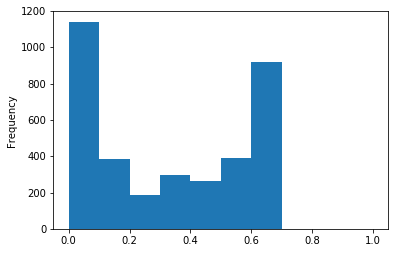

In [1475]:
bldf2.occupied.plot.hist()

### Checking reviews as target

In [1478]:
bldf2['review_agg'].head()

0    0.847222
1    0.958333
2    0.916667
3    0.958333
4    0.951389
Name: review_agg, dtype: float64

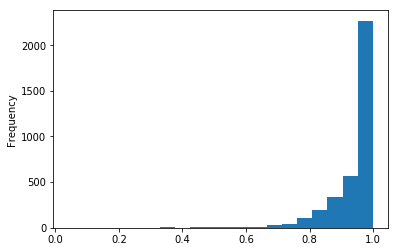

In [1481]:
bldf2['review_agg'].plot.hist(bins=20)

In [1482]:
bldf2['review_agg'].quantile([.25,.5,.75])

0.25    0.916667
0.50    0.979167
0.75    0.979167
Name: review_agg, dtype: float64

In [1483]:
boston['review_scores_rating'].quantile([.25,.5,.75])

KeyError: 0.0

In [1284]:
boston['score_group'] = boston['review_scores_rating'].apply(lambda x: 4 if x>=98.0 else 
                                                   (3 if x>=94.0 and x<98.0 else 
                                                    (2 if x>=89.0 and x<94.0 else 1)))

In [1322]:
boston['score_group'] = boston['review_agg'].apply(lambda x: 4 if x>=9.83 else 
                                                   (3 if x>=9.66 and x<9.83 else 
                                                    (2 if x>=9.33 and x<9.66 else 1)))

In [1285]:
boston.isnull().values.any()

False

In [1305]:
#y = boston['review_agg']
#y = boston['occupied']
#y = boston['score_group']
y = boston['review_scores_rating']
#X = boston.drop(['occupied','listing_id','id'], axis=1)
#X = boston.drop(['review_agg','listing_id','id'], axis=1)
#X = boston.drop(['score_group','review_agg','review_scores_rating','listing_id','id'],axis=1)
X = boston.drop(['score_group','review_agg','review_scores_rating','listing_id','id'],axis=1)

KeyError: "['score_group'] not found in axis"

In [1306]:
X.head()

,occupied,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,accommodates,bathrooms,bedrooms,beds,amenities,price_y,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,host_since_year,n_years,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,neighbourhood_cleansed_Allston,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Bay Village,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Charlestown,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Downtown,neighbourhood_cleansed_East Boston,neighbourhood_cleansed_Fenway,neighbourhood_cleansed_Hyde Park,neighbourhood_cleansed_Jamaica Plain,neighbourhood_cleansed_Leather District,neighbourhood_cleansed_Longwood Medical Area,neighbourhood_cleansed_Mattapan,neighbourhood_cleansed_Mission Hill,neighbourhood_cleansed_North End,neighbourhood_cleansed_Roslindale,neighbourhood_cleansed_Roxbury,neighbourhood_cleansed_South Boston,neighbourhood_cleansed_South Boston Waterfront,neighbourhood_cleansed_South End,neighbourhood_cleansed_West End,neighbourhood_cleansed_West Roxbury,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Camper/RV,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa
0,116,0.9,0.78,0,6,0.000000,0.166667,0.2,0.0625,20,0.007519,0.166667,0.020067,3.640000e-06,0.084158,0,0,0,2008,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,21,1.0,0.90,0,7,0.066667,0.166667,0.2,0.0625,23,0.033835,0.133333,0.006689,7.290000e-06,0.089109,0,0,0,2009,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,41,1.0,0.90,0,7,0.200000,0.166667,0.2,0.1250,13,0.046366,0.233333,0.006689,7.290000e-06,0.116337,0,0,0,2009,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,46,1.0,0.88,1,1,0.066667,0.166667,0.2,0.0625,13,0.013784,0.000000,0.006689,4.400000e-07,0.101485,0,1,0,2009,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,117,1.0,0.93,0,12,0.133333,0.166667,0.2,0.0625,22,0.036090,0.833333,0.096990,3.640000e-06,0.044554,0,0,0,2009,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [1307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

In [1308]:
ab_clf = AdaBoostClassifier(learning_rate=1.0, random_state=34, n_estimators = 200)
ab_clf.fit(X_train, y_train)
y_preds = ab_clf.predict(X_test)
accuracy_score(y_test, y_preds)

0.18427835051546393

In [1179]:
X.head()

,occupied,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,accommodates,bathrooms,bedrooms,beds,amenities,price_y,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,host_since_year,n_years,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,neighbourhood_cleansed_Allston,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Bay Village,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Charlestown,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Downtown,neighbourhood_cleansed_East Boston,neighbourhood_cleansed_Fenway,neighbourhood_cleansed_Hyde Park,neighbourhood_cleansed_Jamaica Plain,neighbourhood_cleansed_Leather District,neighbourhood_cleansed_Longwood Medical Area,neighbourhood_cleansed_Mattapan,neighbourhood_cleansed_Mission Hill,neighbourhood_cleansed_North End,neighbourhood_cleansed_Roslindale,neighbourhood_cleansed_Roxbury,neighbourhood_cleansed_South Boston,neighbourhood_cleansed_South Boston Waterfront,neighbourhood_cleansed_South End,neighbourhood_cleansed_West End,neighbourhood_cleansed_West Roxbury,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Camper/RV,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa
0,116,0.9,0.78,0,6,0.000000,0.166667,0.2,0.0625,20,0.007519,0.166667,0.020067,3.640000e-06,0.084158,0,0,0,2008,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,21,1.0,0.90,0,7,0.066667,0.166667,0.2,0.0625,23,0.033835,0.133333,0.006689,7.290000e-06,0.089109,0,0,0,2009,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,41,1.0,0.90,0,7,0.200000,0.166667,0.2,0.1250,13,0.046366,0.233333,0.006689,7.290000e-06,0.116337,0,0,0,2009,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,46,1.0,0.88,1,1,0.066667,0.166667,0.2,0.0625,13,0.013784,0.000000,0.006689,4.400000e-07,0.101485,0,1,0,2009,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,117,1.0,0.93,0,12,0.133333,0.166667,0.2,0.0625,22,0.036090,0.833333,0.096990,3.640000e-06,0.044554,0,0,0,2009,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [1180]:
y.value_counts()

4    1425
1     640
2     474
3     359
Name: score_group, dtype: int64

In [1181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

In [1217]:
ab_clf = AdaBoostClassifier(learning_rate=0.2, random_state=34, n_estimators = 200)

In [1218]:
ab_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.2, n_estimators=200, random_state=34)

In [1219]:
y_preds = ab_clf.predict(X_test)

In [1220]:
accuracy_score(y_test, y_preds)

0.599791013584117

In [1200]:
confusion_matrix(y_test,y_preds)

array([[ 96,  43,  16,  48],
       [ 37,  47,  31,  46],
       [ 26,  22,  22,  46],
       [ 43,  31,  61, 342]])

In [1222]:
features = pd.Series(data=ab_clf.feature_importances_, index = X.columns)
features.sort_values(ascending=False)

price_y                                           0.130
number_of_reviews                                 0.120
occupied                                          0.075
host_is_superhost                                 0.070
host_listings_count                               0.070
amenities                                         0.070
beds                                              0.045
host_response_rate                                0.040
accommodates                                      0.040
host_acceptance_rate                              0.020
neighbourhood_cleansed_Roxbury                    0.020
host_since_year                                   0.020
neighbourhood_cleansed_Jamaica Plain              0.020
neighbourhood_cleansed_South End                  0.020
bathrooms                                         0.020
maximum_nights                                    0.015
neighbourhood_cleansed_Charlestown                0.015
neighbourhood_cleansed_North End                

In [1225]:
parameters = {'learning_rate': np.arange(0.1,1.1,0.1), 'n_estimators':[100, 200, 300, 400, 500, 1000]}
grid_clf = GridSearchCV(ab_clf, parameters, cv=5)

In [1226]:
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.2, n_estimators=200, random_state=34),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), 'n_estimators': [100, 200, 300, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1228]:
grid_clf.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=300, random_state=34)

In [1229]:
grid_clf.best_score_

0.5919629057187017

In [1122]:
ab_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), random_state=34, n_estimators = 2000)

In [1123]:
ab_reg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=2000,
         random_state=34)

In [1124]:
ab_reg.feature_importances_

array([0.03337838, 0.07459657, 0.00817572, 0.10929846, 0.02311079,
       0.02243337, 0.01212874, 0.01228149, 0.07273526, 0.09859387,
       0.04458921, 0.07383744, 0.02767666, 0.06172971, 0.00617757,
       0.00198199, 0.00078667, 0.01173151, 0.01616594, 0.03982336,
       0.01529434, 0.00537219, 0.00475267, 0.00049444, 0.00083956,
       0.00024412, 0.000646  , 0.00223397, 0.0082021 , 0.01113863,
       0.00511256, 0.00609275, 0.00775893, 0.00377284, 0.        ,
       0.00844009, 0.00578432, 0.00176807, 0.00222916, 0.00999215,
       0.05964365, 0.00621232, 0.00130549, 0.00564122, 0.00212966,
       0.        , 0.00045292, 0.00454992, 0.00750711, 0.01194765,
       0.01057989, 0.00316907, 0.00081243, 0.00648298, 0.0038609 ,
       0.00091433, 0.00244876, 0.00573582, 0.00126797, 0.        ,
       0.        , 0.00454549, 0.        , 0.        , 0.        ,
       0.00383807, 0.00493246, 0.00014373, 0.00047653, 0.        ])

In [1125]:
y_preds = ab_reg.predict(X_test)

In [1126]:
mean_squared_error(y_test, y_preds)

16336.345101531932

In [1127]:
r2_score(y_test,y_preds)

-0.002774925777520476

In [1119]:
# try lasso
reg_lasso = Lasso(alpha=0.1)
reg_lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [1120]:
y_preds = reg_lasso.predict(X_test)

In [1121]:
r2_score(y_test,y_preds)

0.12570491750604584

Reviews are left-skewed. There are too many good reviews and that's not a good metric. Probably the average time a property stays is a better measure of success.

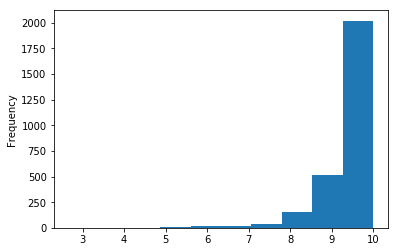

In [933]:
bldf[['review_scores_accuracy',
      'review_scores_cleanliness',
      'review_scores_checkin',
      'review_scores_communication',
      'review_scores_location',
      'review_scores_value']].mean(axis=1).plot.hist();

Boston price has the targets - days occupied. We now join both.

### PCA

In [1379]:
boston_pca = boston.drop(['score_group','review_agg','listing_id','id'],axis=1)

In [1380]:
boston_pca.head()

,occupied,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,accommodates,bathrooms,bedrooms,beds,amenities,price_y,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,host_since_year,n_years,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,neighbourhood_cleansed_Allston,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Bay Village,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Charlestown,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Downtown,neighbourhood_cleansed_East Boston,neighbourhood_cleansed_Fenway,neighbourhood_cleansed_Hyde Park,neighbourhood_cleansed_Jamaica Plain,neighbourhood_cleansed_Leather District,neighbourhood_cleansed_Longwood Medical Area,neighbourhood_cleansed_Mattapan,neighbourhood_cleansed_Mission Hill,neighbourhood_cleansed_North End,neighbourhood_cleansed_Roslindale,neighbourhood_cleansed_Roxbury,neighbourhood_cleansed_South Boston,neighbourhood_cleansed_South Boston Waterfront,neighbourhood_cleansed_South End,neighbourhood_cleansed_West End,neighbourhood_cleansed_West Roxbury,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Camper/RV,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa
0,116,0.9,0.78,0,6,0.000000,0.166667,0.2,0.0625,20,0.007519,0.166667,0.020067,3.640000e-06,0.084158,90.0,0,0,0,2008,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,21,1.0,0.90,0,7,0.066667,0.166667,0.2,0.0625,23,0.033835,0.133333,0.006689,7.290000e-06,0.089109,91.0,0,0,0,2009,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,41,1.0,0.90,0,7,0.200000,0.166667,0.2,0.1250,13,0.046366,0.233333,0.006689,7.290000e-06,0.116337,95.0,0,0,0,2009,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,46,1.0,0.88,1,1,0.066667,0.166667,0.2,0.0625,13,0.013784,0.000000,0.006689,4.400000e-07,0.101485,98.0,0,1,0,2009,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,117,1.0,0.93,0,12,0.133333,0.166667,0.2,0.0625,22,0.036090,0.833333,0.096990,3.640000e-06,0.044554,91.0,0,0,0,2009,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [1371]:
boston_pca = boston.drop(['score_group','listing_id','id'],axis=1)
pca = PCA(n_components=10)
pca.fit(boston_pca)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [1372]:
print(pca.explained_variance_ratio_)

[5.89659202e-01 4.07456174e-01 2.08348268e-03 5.63799057e-04
 1.55408405e-04 1.45549400e-05 9.61712247e-06 6.06456310e-06
 5.48832401e-06 3.82194830e-06]


In [1377]:
pca.explained_variance_ratio_.sum()

AttributeError: 'function' object has no attribute 'explained_variance_ratio_'

In [1378]:
boston_pca.head()

,occupied,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,accommodates,bathrooms,bedrooms,beds,amenities,price_y,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,host_since_year,n_years,review_agg,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,neighbourhood_cleansed_Allston,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Bay Village,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Charlestown,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Downtown,neighbourhood_cleansed_East Boston,neighbourhood_cleansed_Fenway,neighbourhood_cleansed_Hyde Park,neighbourhood_cleansed_Jamaica Plain,neighbourhood_cleansed_Leather District,neighbourhood_cleansed_Longwood Medical Area,neighbourhood_cleansed_Mattapan,neighbourhood_cleansed_Mission Hill,neighbourhood_cleansed_North End,neighbourhood_cleansed_Roslindale,neighbourhood_cleansed_Roxbury,neighbourhood_cleansed_South Boston,neighbourhood_cleansed_South Boston Waterfront,neighbourhood_cleansed_South End,neighbourhood_cleansed_West End,neighbourhood_cleansed_West Roxbury,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Camper/RV,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa
0,116,0.9,0.78,0,6,0.000000,0.166667,0.2,0.0625,20,0.007519,0.166667,0.020067,3.640000e-06,0.084158,90.0,0,0,0,2008,0,8.833333,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,21,1.0,0.90,0,7,0.066667,0.166667,0.2,0.0625,23,0.033835,0.133333,0.006689,7.290000e-06,0.089109,91.0,0,0,0,2009,1,9.666667,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,41,1.0,0.90,0,7,0.200000,0.166667,0.2,0.1250,13,0.046366,0.233333,0.006689,7.290000e-06,0.116337,95.0,0,0,0,2009,1,9.333333,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,46,1.0,0.88,1,1,0.066667,0.166667,0.2,0.0625,13,0.013784,0.000000,0.006689,4.400000e-07,0.101485,98.0,0,1,0,2009,1,9.666667,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,117,1.0,0.93,0,12,0.133333,0.166667,0.2,0.0625,22,0.036090,0.833333,0.096990,3.640000e-06,0.044554,91.0,0,0,0,2009,1,9.666667,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [1374]:
def pca(df, n_components):
    '''
    Generates PCA model
    
    INPUT: df - scaled dataframe
           n_components - number of components for the model
           
    OUTPUT: pca_model - PCA object
            var_pca - dataframe with components and explained variances
            X_pca - numpy array with transformed data
    '''
    pca_model = PCA(n_components)
    X_pca = pca_model.fit_transform(df)
    components = pd.DataFrame(np.round(pca_model.components_, 4), columns = df.keys())
    ratios = pca_model.explained_variance_ratio_.reshape(len(pca_model.components_),1)
    dimensions = ['Dim {}'.format(i) for i in range(len(pca_model.components_))]
    components.index = dimensions
    variance_ratios = pd.DataFrame(np.round(ratios,4), columns=['Explained_Variance'])
    variance_ratios.index = dimensions
    var_pca = pd.concat([variance_ratios, components], axis=1)
    
    return pca_model, var_pca, X_pca

In [1375]:
pca_model, var_pca, X_pca = pca(boston_pca, 20)

In [1376]:
var_pca.head()

,Explained_Variance,occupied,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,accommodates,bathrooms,bedrooms,beds,amenities,price_y,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,host_since_year,n_years,review_agg,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,neighbourhood_cleansed_Allston,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Bay Village,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Charlestown,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Downtown,neighbourhood_cleansed_East Boston,neighbourhood_cleansed_Fenway,neighbourhood_cleansed_Hyde Park,neighbourhood_cleansed_Jamaica Plain,neighbourhood_cleansed_Leather District,neighbourhood_cleansed_Longwood Medical Area,neighbourhood_cleansed_Mattapan,neighbourhood_cleansed_Mission Hill,neighbourhood_cleansed_North End,neighbourhood_cleansed_Roslindale,neighbourhood_cleansed_Roxbury,neighbourhood_cleansed_South Boston,neighbourhood_cleansed_South Boston Waterfront,neighbourhood_cleansed_South End,neighbourhood_cleansed_West End,neighbourhood_cleansed_West Roxbury,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Camper/RV,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa
Dim 0,0.5897,0.0096,-0.0000,-0.0005,-0.0003,0.9999,0.0001,0.0001,0.0001,0.0000,-0.0017,0.0000,0.0003,0.0000,-0.0000,-0.0001,-0.0087,-0.0001,-0.0001,0.0008,-0.0020,-0.0020,-0.0009,0.0008,-0.0007,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0001,-0.0004,-0.0003,0.0001,0.0006,-0.0001,0.0003,-0.0000,-0.0001,-0.0001,-0.0001,0.0002,-0.0002,0.0001,-0.0001,0.0004,-0.0000,-0.0002,-0.0000,-0.0000,-0.0000,0.0000,-0.0001,-0.0000,-0.0001,-0.0001,0.0001,-0.0000,0.0001,-0.0000,0.0005,-0.0000,-0.0000,-0.0,-0.0000,-0.0000,-0.0000,-0.0000,-0.0004,-0.0000,-0.0000,-0.0000,-0.0000
Dim 1,0.4075,0.9999,-0.0001,0.0001,0.0001,-0.0095,-0.0000,-0.0000,-0.0001,-0.0000,-0.0052,-0.0000,-0.0002,-0.0000,-0.0000,-0.0001,0.0083,0.0000,-0.0000,-0.0002,0.0031,0.0031,0.0007,0.0003,-0.0002,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0001,0.0004,-0.0003,-0.0002,0.0001,-0.0000,-0.0000,0.0001,-0.0000,0.0000,0.0000,-0.0002,0.0000,0.0000,0.0001,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0001,-0.0000,-0.0000,0.0000,0.0001,-0.0000,-0.0000,0.0002,-0.0001,-0.0000,-0.0,0.0002,0.0000,-0.0000,0.0000,-0.0003,0.0000,-0.0000,0.0001,-0.0000
Dim 2,0.0021,0.0090,-0.0017,-0.0003,-0.0099,-0.0085,-0.0009,-0.0005,-0.0016,-0.0005,0.1475,-0.0005,-0.0014,0.0001,-0.0000,-0.0002,-0.9869,-0.0003,-0.0008,-0.0006,-0.0009,-0.0009,-0.0626,-0.0034,0.0035,-0.0001,0.0001,0.0000,0.0002,0.0001,-0.0003,0.0009,-0.0014,0.0013,-0.0007,0.0014,-0.0001,0.0000,-0.0005,-0.0005,-0.0005,-0.0004,0.0032,-0.0006,0.0019,0.0017,0.0001,-0.0030,-0.0000,-0.0000,0.0002,0.0011,-0.0002,-0.0008,0.0012,-0.0011,-0.0009,-0.0015,-0.0001,-0.0005,0.0032,0.0001,0.0000,-0.0,-0.0019,0.0001,-0.0000,-0.0000,-0.0003,-0.0005,0.0002,-0.0007,-0.0000
Dim 3,0.0006,0.0042,-0.0021,-0.0029,-0.0088,0.0028,-0.0071,-0.0018,-0.0066,-0.0035,0.9865,-0.0013,-0.0042,0.0001,0.0000,-0.0011,0.1474,-0.0097,-0.0007,-0.0002,-0.0434,-0.0434,0.0067,-0.0146,0.0128,0.0018,0.0011,0.0001,0.0005,0.0003,-0.0021,0.0135,-0.0075,-0.0111,0.0050,0.0004,0.0021,0.0004,0.0026,0.0001,0.0005,-0.0004,0.0037,-0.0030,0.0022,-0.0021,0.0007,-0.0029,-0.0001,0.0003,0.0007,-0.0002,0.0001,0.0004,0.0018,-0.0031,-0.0024,-0.0009,-0.0014,0.0007,0.0036,0.0013,0.0001,-0.0,-0.0077,0.0000,0.0002,-0.0000,0.00

In [1370]:
evr = []
for i in range(2,50):
    pca_model = PCA(n_components=i)
    X_pca = pca_model.fit_transform(boston_pca)
    evr_tmp = pca_model.explained_variance_ratio_.sum()
    evr.append(evr_tmp)
    print('components {}: {}'.format(i,evr_tmp))

ncomp = np.arange(10,100)

components 2: 0.9993638782998817
components 3: 0.9998132350391571
components 4: 0.9999331879079919
components 5: 0.9999437326389328
components 6: 0.9999512905430469
components 7: 0.9999582324764821
components 8: 0.999962724494887
components 9: 0.9999670641334301
components 10: 0.999969890833903
components 11: 0.9999720577345633
components 12: 0.9999739101616557
components 13: 0.9999756400090175
components 14: 0.9999773658387672
components 15: 0.9999789207931108
components 16: 0.9999804128578026
components 17: 0.9999818721190307
components 18: 0.9999831607801356
components 19: 0.9999843128914591
components 20: 0.9999854020133857
components 21: 0.9999864416004556
components 22: 0.9999874309529249
components 23: 0.999988379540786
components 24: 0.9999892995059871
components 25: 0.999990200896381
components 26: 0.9999910653647119
components 27: 0.9999917967209726
components 28: 0.9999924658237576
components 29: 0.9999930570677804
components 30: 0.9999936153399461
components 31: 0.999994146

In [1245]:
def pca_analysis(var_pca, component):
    '''
    Generate a dataframe with the attributes listed by weight for
    a given component.
    
    INPUT: var_pca - dataframe with the PCA output
           component - number of the component
           
    OUTPUT: dataframe with attributes and weights
    '''
    
    df = pd.DataFrame(var_pca.iloc[component,:].sort_values(axis=0, ascending=False))
    df['attribute {}'.format(component)] = df.index
    df.set_index(np.arange(var_pca.shape[1]), inplace=True)

    return df

In [1493]:
list_df = []
for i in range(20):
    list_df.append(pca_analysis(var_pca, i))
var_comp = pd.concat([x for x in list_df],axis=1)

In [1494]:
var_comp.head()

,Dim 0,attribute 0,Dim 1,attribute 1,Dim 2,attribute 2,Dim 3,attribute 3,Dim 4,attribute 4,Dim 5,attribute 5,Dim 6,attribute 6,Dim 7,attribute 7,Dim 8,attribute 8,Dim 9,attribute 9,Dim 10,attribute 10,Dim 11,attribute 11,Dim 12,attribute 12,Dim 13,attribute 13,Dim 14,attribute 14,Dim 15,attribute 15,Dim 16,attribute 16,Dim 17,attribute 17,Dim 18,attribute 18,Dim 19,attribute 19
0,0.9999,host_listings_count,0.9999,occupied,0.1475,amenities,0.9865,amenities,0.0402,require_guest_phone_verification,0.5578,room_type_Private room,0.6959,cancellation_policy_strict,0.4543,property_type_House,0.7686,cancellation_policy_flexible,0.9294,instant_bookable,0.7948,host_is_superhost,0.4579,host_is_superhost,0.6523,neighbourhood_cleansed_South End,0.6448,neighbourhood_cleansed_Jamaica Plain,0.5327,neighbourhood_cleansed_Back Bay,0.5583,neighbourhood_cleansed_Dorchester,0.6039,neighbourhood_cleansed_Dorchester,0.7272,require_guest_phone_verification,0.4611,neighbourhood_cleansed_Beacon Hill,0.5873,neighbourhood_cleansed_Fenway
1,0.5897,Explained_Variance,0.4075,Explained_Variance,0.0090,occupied,0.1474,review_scores_rating,0.0191,room_type_Entire home/apt,0.2874,property_type_House,0.2039,property_type_House,0.3587,room_type_Entire home/apt,0.1189,room_type_Entire home/apt,0.2275,host_acceptance_rate,0.4894,review_agg,0.1026,property_type_House,0.3337,property_type_Condominium,0.3020,neighbourhood_cleansed_South End,0.4405,property_type_Condominium,0.2469,property_type_Condominium,0.3746,neighbourhood_cleansed_Back Bay,0.3831,require_guest_profile_picture,0.2385,require_guest_phone_verification,0.2016,neighbourhood_cleansed_South Boston
2,0.0096,occupied,0.0083,review_scores_rating,0.0035,room_type_Private room,0.0135,cancellation_policy_flexible,0.0188,cancellation_policy_super_strict_30,0.1511,cancellation_policy_moderate,0.1196,room_type_Private room,0.2437,cancellation_policy_moderate,0.0729,property_type_House,0.0966,property_type_Apartment,0.2489,neighbourhood_cleansed_Jamaica Plain,0.0921,neighbourhood_cleansed_Dorchester,0.2069,host_is_superhost,0.2582,property_type_Condominium,0.1887,host_is_superhost,0.1694,neighbourhood_cleansed_Beacon Hill,0.3603,neighbourhood_cleansed_Jamaica Plain,0.3387,host_acceptance_rate,0.1949,instant_bookable,0.1325,room_type_Shared room
3,0.0008,require_guest_phone_verification,0.0031,n_years,0.0032,property_type_Apartment,0.0128,room_type_Private room,0.0126,require_guest_profile_picture,0.1197,cancellation_policy_flexible,0.1164,instant_bookable,0.1293,property_type_Condominium,0.0335,cancellation_policy_super_strict_30,0.0730,neighbourhood_cleansed_East Boston,0.1076,host_acceptance_rate,0.0886,neighbourhood_cleansed_Jamaica Plain,0.1148,neighbourhood_cleansed_Dorchester,0.0935,instant_bookable,0.1377,neighbourhood_cleansed_South Boston,0.1511,review_agg,0.2747,neighbourhood_cleansed_South End,0.1936,neighbourhood_cleansed_Fenway,0.1580,neighbourhood_cleansed_Fenway,0.1125,bed_type_Futon
4,0.0008,room_type_Entire home/apt,0.0031,host_since_year,0.0032,neighbourhood_cleansed_Dorchester,0.0067,review_agg,0.0103,number_of_reviews,0.0886,neighbourhood_cleansed_Dorchester,0.0432,neighbourhood_cleansed_Allston,0.0885,bedrooms,0.0223,neighbourhood_cleansed_South Boston,0.0626,number_of_reviews,0.1035,instant_bookable,0.0826,neighbourhood_cleansed_Roxbury,0.0767,neighbourhood_cleansed_South Boston,0.0495,property_type_Townhouse,0.0575,bed_type_Real Bed,0.1246,neighbourhood_cleansed_South Boston,0.0832,instant_bookable,0.1909,host_response_rate,0.1167,require_guest_profile_picture,0.0871,neighbourhood_cleansed_North End


In [1495]:
var_comp.tail()

,Dim 0,attribute 0,Dim 1,attribute 1,Dim 2,attribute 2,Dim 3,attribute 3,Dim 4,attribute 4,Dim 5,attribute 5,Dim 6,attribute 6,Dim 7,attribute 7,Dim 8,attribute 8,Dim 9,attribute 9,Dim 10,attribute 10,Dim 11,attribute 11,Dim 12,attribute 12,Dim 13,attribute 13,Dim 14,attribute 14,Dim 15,attribute 15,Dim 16,attribute 16,Dim 17,attribute 17,Dim 18,attribute 18,Dim 19,attribute 19
68,-0.0009,review_agg,-0.0002,require_guest_phone_verification,-0.0034,room_type_Entire home/apt,-0.0097,instant_bookable,-0.0181,room_type_Private room,-0.0785,neighbourhood_cleansed_Back Bay,-0.0734,require_guest_phone_verification,-0.0403,neighbourhood_cleansed_Fenway,-0.0776,property_type_Apartment,-0.0634,property_type_House,-0.0364,neighbourhood_cleansed_Fenway,-0.0748,neighbourhood_cleansed_South Boston,-0.0672,bedrooms,-0.1273,review_agg,-0.0875,neighbourhood_cleansed_Dorchester,-0.1185,neighbourhood_cleansed_Allston,-0.1600,neighbourhood_cleansed_East Boston,-0.0962,host_is_superhost,-0.0889,neighbourhood_cleansed_South Boston,-0.1105,neighbourhood_cleansed_Downtown
69,-0.0017,amenities,-0.0003,cancellation_policy_strict,-0.0085,host_listings_count,-0.0111,cancellation_policy_strict,-0.0235,cancellation_policy_flexible,-0.0991,cleaning_fee,-0.0969,cancellation_policy_flexible,-0.1187,cancellation_policy_flexible,-0.0812,host_acceptance_rate,-0.0670,host_is_superhost,-0.0386,review_scores_rating,-0.0840,room_type_Private room,-0.1300,neighbourhood_cleansed_Back Bay,-0.1606,host_is_superhost,-0.2103,property_type_Apartment,-0.2202,require_guest_phone_verification,-0.1775,neighbourhood_cleansed_Allston,-0.1119,cancellation_policy_moderate,-0.1059,neighbourhood_cleansed_Downtown,-0.1339,host_acceptance_rate
70,-0.0020,n_years,-0.0003,property_type_House,-0.0099,host_is_superhost,-0.0146,room_type_Entire home/apt,-0.0599,amenities,-0.2753,cancellation_policy_strict,-0.1117,room_type_Entire home/apt,-0.1258,cancellation_policy_strict,-0.1312,room_type_Private room,-0.0862,cancellation_policy_strict,-0.0566,neighbourhood_cleansed_Roxbury,-0.1803,property_type_Condominium,-0.1958,property_type_Apartment,-0.2788,neighbourhood_cleansed_Back Bay,-0.2301,review_agg,-0.2255,property_type_House,-0.2279,neighbourhood_cleansed_Beacon Hill,-0.1222,bed_type_Real Bed,-0.3464,host_response_rate,-0.1357,neighbourhood_cleansed_East Boston
71,-0.0020,host_since_year,-0.0052,amenities,-0.0626,review_agg,-0.0434,n_years,-0.7043,n_years,-0.3425,property_type_Apartment,-0.2865,property_type_Apartment,-0.3438,room_type_Private room,-0.3020,cancellation_policy_strict,-0.0876,review_agg,-0.0587,property_type_Condominium,-0.2413,neighbourhood_cleansed_Back Bay,-0.2324,property_type_House,-0.2833,property_type_House,-0.3820,property_type_House,-0.3251,neighbourhood_cleansed_South End,-0.2286,neighbourhood_cleansed_South Boston,-0.1238,neighbourhood_cleansed_Allston,-0.4752,neighbourhood_cleansed_East Boston,-0.2802,bed_type_Real Bed
72,-0.0087,review_scores_rating,-0.0095,host_listings_count,-0.9869,review_scores_rating,-0.0434,host_since_year,-0.7043,host_since_year,-0.5604,room_type_Entire home/apt,-0.5667,cancellation_policy_moderate,-0.6272,property_type_Apartment,-0.5001,cancellation_policy_moderate,-0.1503,neighbourhood_cleansed_Jamaica Plain,-0.0993,neighbourhood_cleansed_Dorchester,-0.7822,review_agg,-0.5081,neighbourhood_cleansed_Jamaica Plain,-0.4087,neighbourhood_cleansed_Dorchester,-0.4264,neighbourhood_cleansed_South End,-0.4977,neighbourhood_cleansed_Back Bay,-0.2323,neighbourhood_cleansed_Fenway,-0.1299,neighbourhood_cleansed_Back Bay,-0.4948,host_acceptance_rate,-0.6221,neighbourhood_cleansed_Beacon Hill


In [1253]:
n_clusters = 10
k_model_final = KMeans(n_clusters = n_clusters, random_state=34).fit(X_pca)
k_score_final = k_model_final.score(X_pca)
k_score_final

-1914252.801378286

In [1254]:
k_pop = pd.DataFrame(np.unique(k_model_final.labels_), columns=['cluster'])
k_pop['population'] = np.bincount(k_model_final.labels_) / k_model_final.labels_.shape[0]

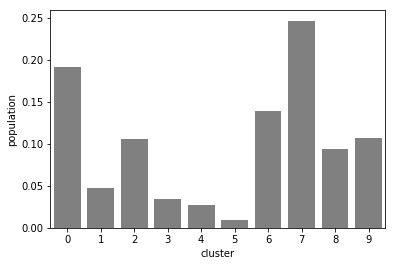

In [1255]:
sns.barplot(x = 'cluster', y = 'population', data=k_pop, color='gray')

In [1256]:
def comp_analysis(comps):
    '''
    Analyze attributes of PCA components for a k-means cluster.
    
    INPUT: comps - list with components
           
    OUTPUT: dataframe 
    '''
    list_df = []
    for i,x in enumerate(comps):
        list_df.append(pd.DataFrame(var_pca.iloc[x,:].sort_values(axis=0, ascending=False)))
        list_df[i]['attribute {}'.format(x)] = list_df[i].index
        list_df[i].set_index(np.arange(var_pca.shape[1]), inplace=True)

    return pd.concat([x for x in list_df],axis=1)

In [1257]:
customer_profile = comp_analysis([0,2,3])

In [1310]:
customer_profile.head()

,Dim 0,attribute 0,Dim 2,attribute 2,Dim 3,attribute 3
0,0.9993,host_listings_count,0.9984,amenities,0.0445,require_guest_phone_verification
1,0.6891,Explained_Variance,0.0147,cancellation_policy_flexible,0.0243,cancellation_policy_super_strict_30
2,0.0376,occupied,0.0130,room_type_Private room,0.0215,room_type_Entire home/apt
3,0.0007,room_type_Entire home/apt,0.0054,neighbourhood_cleansed_Dorchester,0.0108,require_guest_profile_picture
4,0.0005,property_type_Apartment,0.0049,occupied,0.0100,cleaning_fee


In [1312]:
X_pca

array([[-6.52359570e+01, -2.54397108e+01,  5.21270403e+00, ...,
        -3.86456190e-01, -4.09136248e-01,  7.24682384e-01],
       [-6.78136573e+01, -1.20416621e+02,  7.67655003e+00, ...,
        -1.38999591e-01, -2.75084896e-01, -2.56089004e-01],
       [-6.70393549e+01, -1.00384258e+02, -2.23126790e+00, ...,
        -2.19964563e-01, -2.44931169e-01, -1.53102025e-01],
       ...,
       [-7.36108111e+01, -1.15119075e+02, -1.60694342e+00, ...,
        -4.74292856e-02,  1.60178137e-01, -2.30155435e-01],
       [-6.29331165e+01,  1.42628725e+02,  5.62352060e+00, ...,
         2.98861153e-01,  2.79500946e-01,  1.93502920e-01],
       [-3.05405358e+01,  7.23829431e+01,  1.34148300e+00, ...,
         1.13068319e-01, -5.67365488e-02, -2.01239210e-02]])

In [1328]:
boston['score_group']

0       1
1       3
2       2
3       3
4       3
5       3
6       2
7       1
8       4
9       3
11      1
12      1
14      3
15      1
16      1
17      1
19      1
20      4
21      1
22      3
23      1
24      1
25      1
26      1
27      2
28      1
29      2
30      1
31      1
32      2
34      3
35      1
36      1
37      1
38      3
39      1
40      2
41      4
42      1
43      4
44      1
45      4
46      4
47      4
48      1
49      1
52      3
53      1
54      1
55      1
56      4
57      2
58      2
59      1
60      1
61      1
62      4
63      1
64      2
65      1
66      3
67      1
68      1
69      1
70      2
71      1
72      2
73      1
74      1
75      1
76      2
77      2
78      4
79      1
80      2
81      2
82      4
83      2
84      2
85      1
87      1
88      2
89      1
90      1
91      1
92      2
93      3
94      4
95      1
96      4
97      1
98      4
99      4
100     2
101     1
102     4
103     1
104     3
105     1
106     4


In [1323]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = boston_pca.index.values
cluster_map['score']=boston['score_group']
cluster_map['cluster'] = k_model_final.labels_

In [1329]:
cluster_map[cluster_map['score']==4]['cluster'].value_counts()

7    165
0    137
9     93
6     88
2     88
8     81
1     43
3     24
4      9
5      5
Name: cluster, dtype: int64

## Most popular regions and renting 